In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
model_output_file = '../results/model_output_5km.txt'
benchmark_file = '../results/benchmark_5km.txt'
result_file = '../results/result_5km.jpg'
title = "Scatter results for 5km * 5km grid"

In [4]:
model_output = np.loadtxt(model_output_file)
benchmark = np.loadtxt(benchmark_file)

In [5]:

#delete 0, if we do not want to delete 0 in the ground truth data, do not run this cell
index = []

for i in range(0, len(benchmark)):
    if benchmark[i] == 0:
        index.append(i)

benchmark = np.delete(benchmark, index)
model_output = np.delete(model_output, index)

In [6]:
# turn into probability
sum_model = model_output.sum()
model_output = np.divide(model_output, sum_model)

sum_benchmark = benchmark.sum()
benchmark = np.divide(benchmark, sum_benchmark)

In [7]:
def getSSI(outdata, benchmark):
    numerator = 0
    denominator = 0

    for i in range(0, len(benchmark)):
        v_model = outdata[i]
        v_survey = benchmark[i]

        numerator = numerator + min(v_survey, v_model)

    denominator = np.sum(outdata) + np.sum(benchmark)

    SSI = 2 * numerator / denominator
    return SSI

In [8]:
SSI = round(getSSI(model_output, benchmark),4)

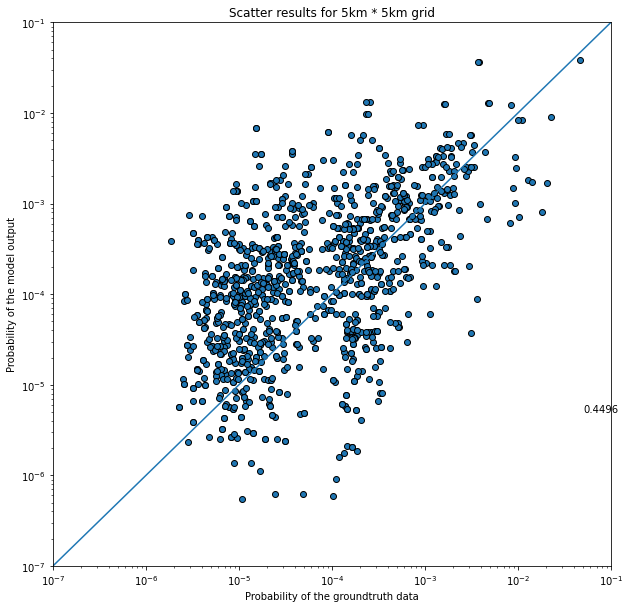

In [9]:
plt.figure(figsize=(10, 10))
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0000001, 0.1)
plt.ylim(0.0000001, 0.1)
plt.scatter(benchmark, model_output, facecolor='C0', edgecolor='k')

plt.title(title)
plt.xlabel("Probability of the groundtruth data")
plt.ylabel("Probability of the model output")

size = len(model_output)
x = np.linspace(0, 0.1, size)
y = np.linspace(0, 0.1, size)
plt.plot(x, y)
plt.text(0.05, 0.000005, 'SSI = %'.format(str(SSI))) 
plt.savefig(result_file, dpi=400)
plt.show()